# logistic Regression Case Study - Leads Scoring 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
<b>Problem Statement</b>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

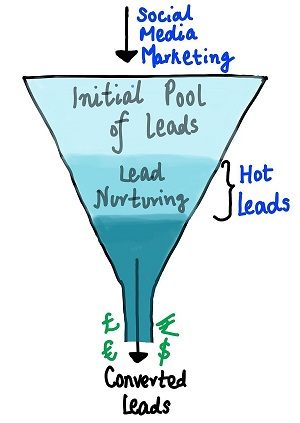

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


<b>Goals of the Case Study</b>

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

### Understanding Data

In [2]:
# Read the data from csv file

leadScoringDf=pd.read_csv("Leads.csv")
leadScoringDf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leadScoringDf.shape

(9240, 37)

In [4]:
leadScoringDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leadScoringDf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Copying the dataframe into new

leadScoringDf_new = leadScoringDf.copy()

In [7]:
# dropping the duplicates

leadScoringDf_new.drop_duplicates(inplace=True)

In [8]:
leadScoringDf_new.shape

(9240, 37)

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>No duplicates found since the shape has no change after dropping duplicates.<br>
    </span>    
</div>

### Data Cleaning

#### Prospect ID & Lead Number features

In [9]:
#check for duplicates in 'Prospect ID' & 'Lead Number'

sum(leadScoringDf.duplicated(subset = 'Prospect ID')) == 0
sum(leadScoringDf.duplicated(subset = 'Lead Number')) == 0

True

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b><br>No duplicate values found in Prospect ID & Lead Number.<br>
Prospect ID & Lead Number features are indication of ID numbers, so can be dropped.
    </span>    
</div>

In [10]:
#dropping Lead Number and Prospect ID since they have all unique values

leadScoringDf.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

#### Treating 'Select' option in all features

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
<b>Info:</b><br>  There are few columns in which there is a level called <b>'Select'</b> which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.</br>
    </span>
</div>

In [11]:
# Replacing 'Select' with NaN (Since it means no option is selected)

leadScoringDf = leadScoringDf.replace('Select', np.nan)

#### Drop features with one unique value

In [12]:
# Checking if there are columns with one unique value since it won't affect our analysis
leadScoringDf.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
<b>Info:  <br></b>  Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include <b>'Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'</b>. Since practically all of the values for these variables are unique, it's best that we drop these columns as they won't help with our analysis.<br> </span>
</div>

In [13]:
# Dropping unique valued columns
leadScoringDf= leadScoringDf.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

#### Drop features with NULL values >45%

In [14]:
#checking null values in each rows
leadScoringDf.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [15]:
# Checking the percentage of missing values
round(100*(leadScoringDf.isnull().sum()/len(leadScoringDf.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
# Removing all the columns that have 45% & more null values
leadScoringDf = leadScoringDf.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education'],axis=1)
leadScoringDf.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [17]:
# Rechecking the percentage of missing values

round(100*(leadScoringDf.isnull().sum()/len(leadScoringDf.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b><br>Null value % is still high for few features. But removing them will cost us a lot of data loss. </br>
        So, instead will replace with 'not provided'. If these result in of no use while modeling, can be dropped later.
    </span>    
</div>

#### Treating features with NULL values >25%

In [18]:
leadScoringDf['Country'] = leadScoringDf['Country'].fillna('not provided')
leadScoringDf['Specialization'] = leadScoringDf['Specialization'].fillna('not provided') 
leadScoringDf['What is your current occupation'] = leadScoringDf['What is your current occupation'].fillna('not provided')
leadScoringDf['What matters most to you in choosing a course'] = leadScoringDf['What matters most to you in choosing a course'].fillna('not provided')
leadScoringDf['Tags'] = leadScoringDf['Tags'].fillna('not provided')
leadScoringDf['City'] = leadScoringDf['City'].fillna('not provided')

leadScoringDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [19]:
# Rechecking the percentage of missing values
round(100*(leadScoringDf.isnull().sum()/len(leadScoringDf.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

### Exploratory Data Analysis

### Categorical Univariate Analysis

In [20]:
# To familiarize all the categorical values
for column in leadScoringDf:
    print(leadScoringDf[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Do Not Email
No     8506
Yes     734
Nam

In [21]:
leadScoringDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

#### Country feature

In [22]:
#checking value counts of Country column

leadScoringDf['Country'].value_counts(dropna=False)

Country
India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [23]:
# Since India has major leads, clubbing all other countries as outside india

def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leadScoringDf['Country'] = leadScoringDf.apply(lambda x:slots(x['Country']), axis = 1)
leadScoringDf['Country'].value_counts()

Country
outside india    6779
not provided     2461
Name: count, dtype: int64

In [24]:
#checking value counts of "City" column

leadScoringDf['City'].value_counts(dropna=False)

City
not provided                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [25]:
leadScoringDf_final=leadScoringDf
leadScoringDf_final.shape

(9240, 23)

#### Categorical Feature Plots

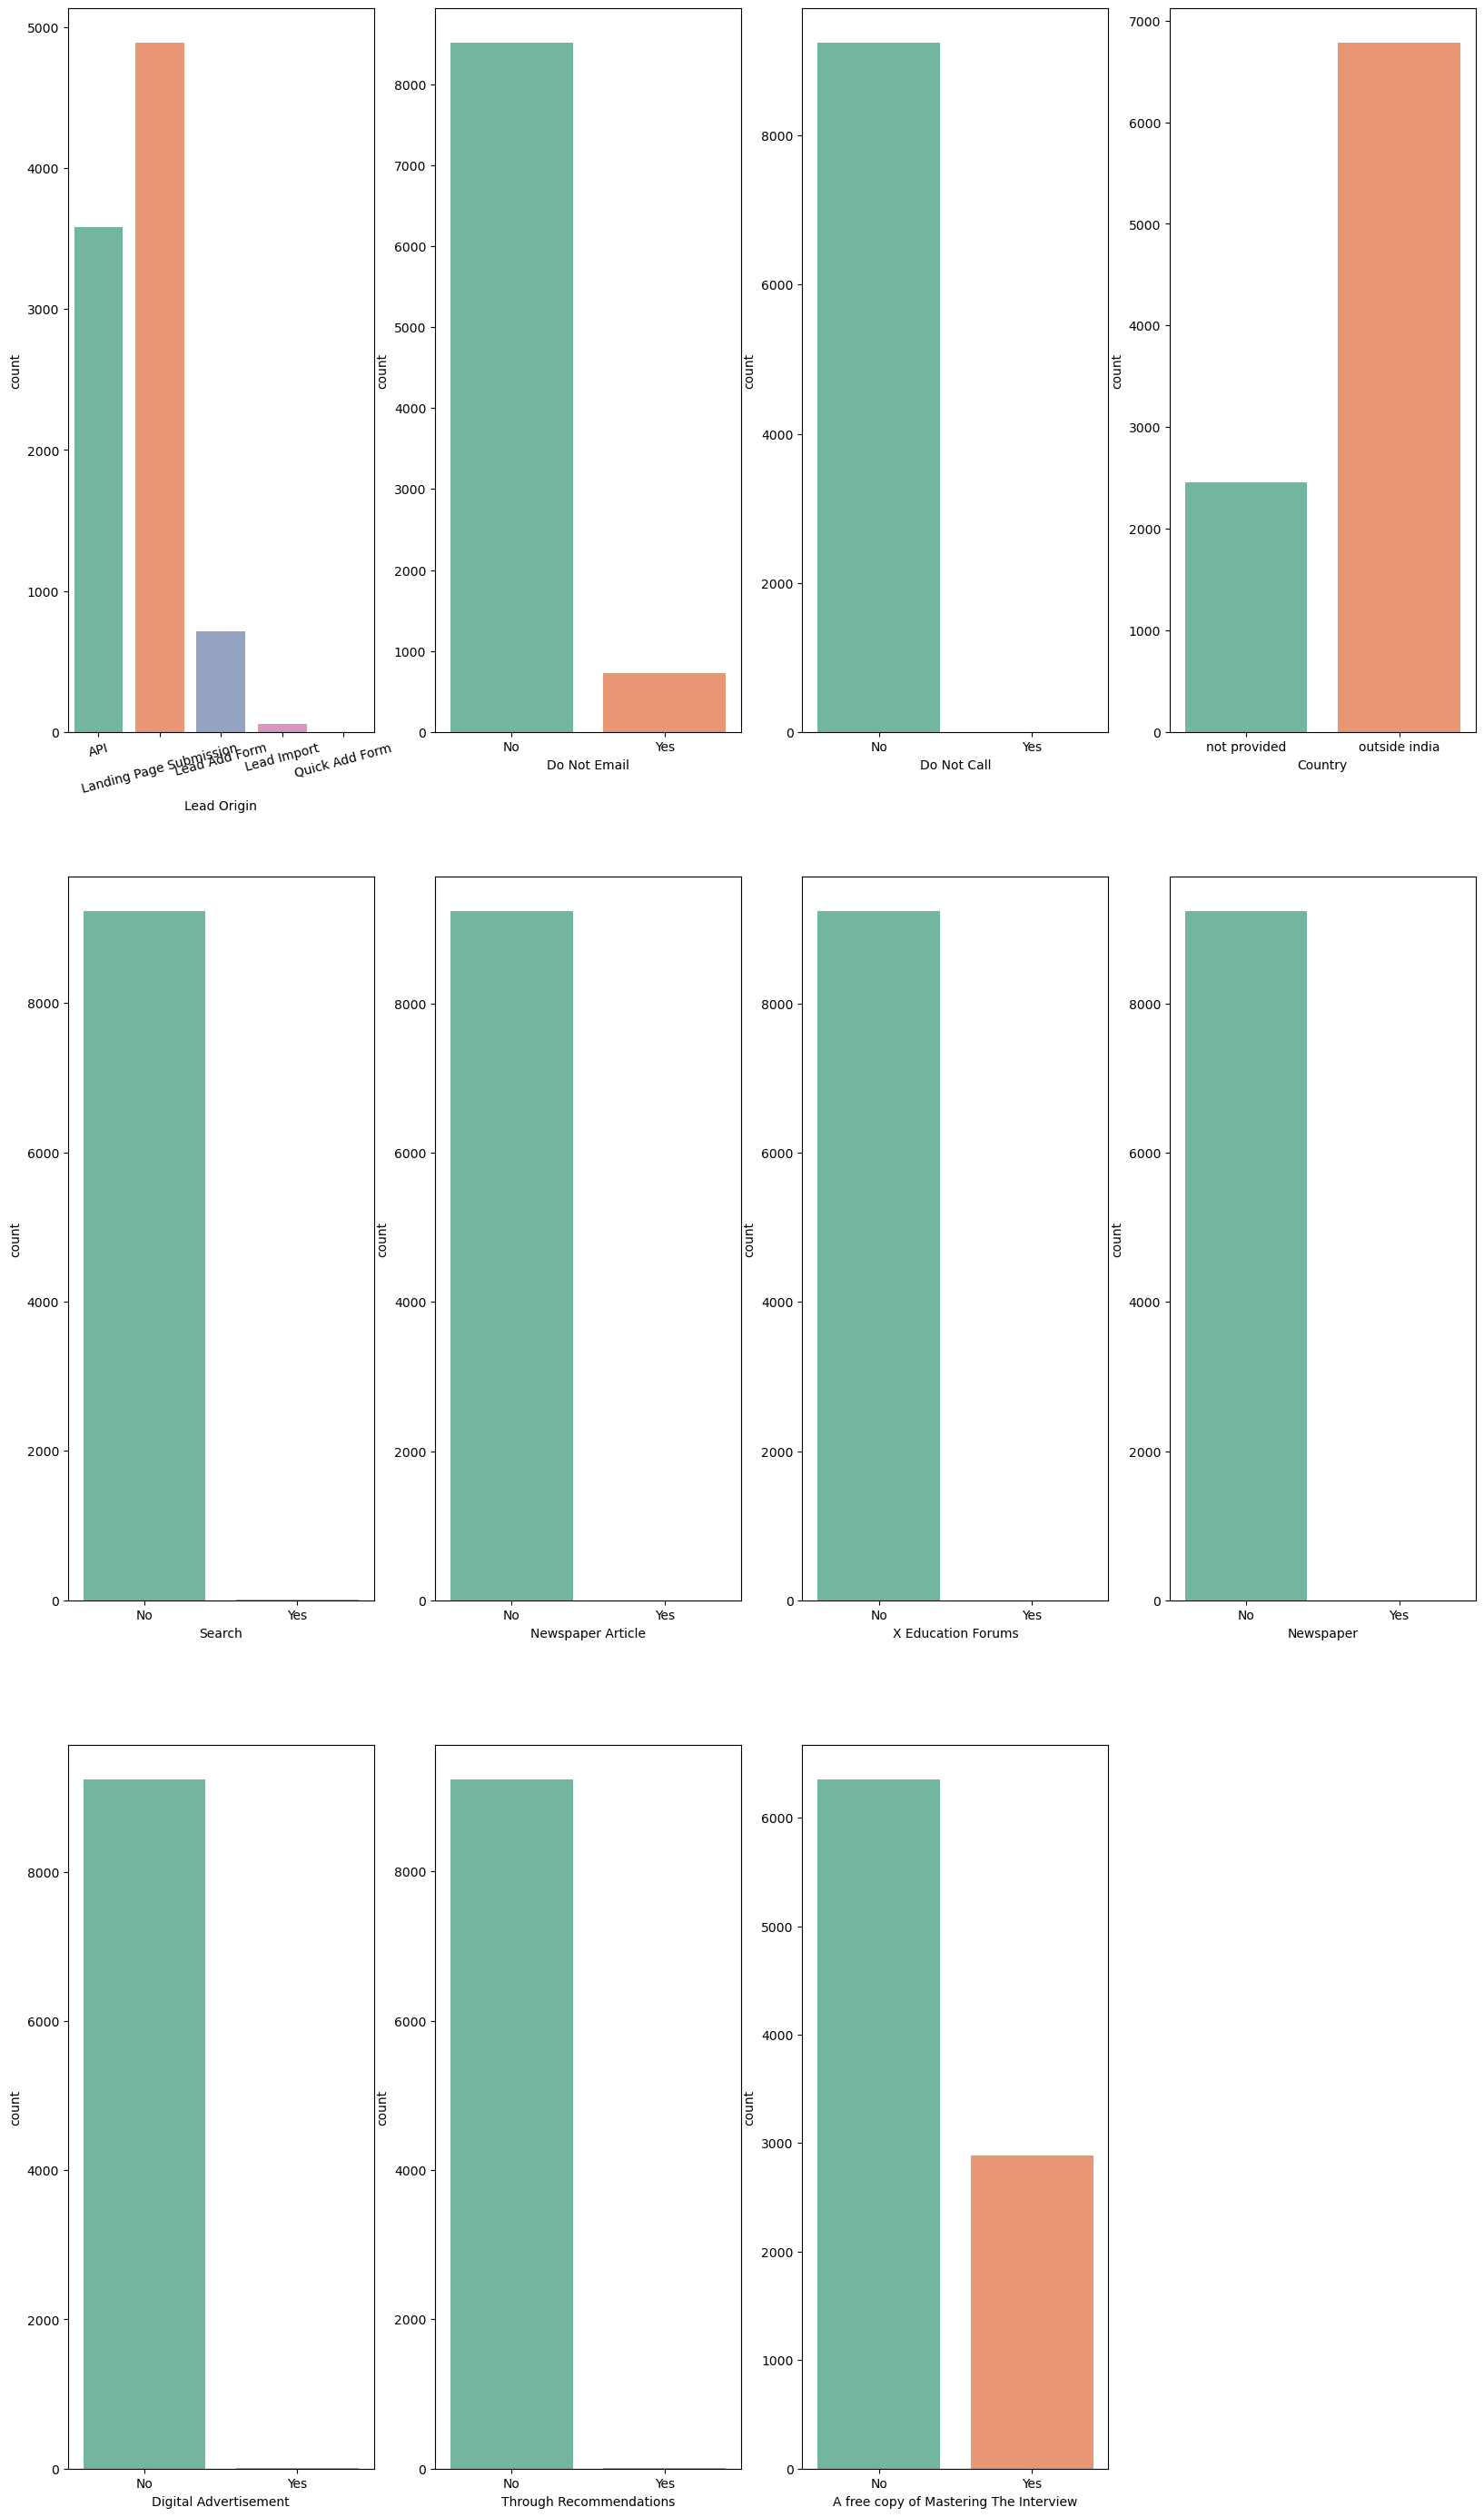

In [26]:
plt.figure(figsize = (20,60))
Pal="Set2"
plt.subplot(5,4,1)
sns.countplot(x=leadScoringDf_final['Lead Origin'],palette = Pal).tick_params(axis='x', rotation = 15)

plt.subplot(5,4,2)
sns.countplot(x=leadScoringDf_final['Do Not Email'],palette = Pal)

plt.subplot(5,4,3)
sns.countplot(x=leadScoringDf_final['Do Not Call'],palette =Pal)
plt.subplot(5,4,4)
sns.countplot(x=leadScoringDf_final['Country'],palette = Pal)

plt.subplot(5,4,5)
sns.countplot(x=leadScoringDf_final['Search'],palette = Pal)

plt.subplot(5,4,6)
sns.countplot(x=leadScoringDf_final['Newspaper Article'],palette = Pal)

plt.subplot(5,4,7)
sns.countplot(x=leadScoringDf_final['X Education Forums'],palette = Pal)

plt.subplot(5,4,8)
sns.countplot(x=leadScoringDf_final['Newspaper'],palette = Pal)

plt.subplot(5,4,9)
sns.countplot(x=leadScoringDf_final['Digital Advertisement'],palette = Pal)

plt.subplot(5,4,10)
sns.countplot(x=leadScoringDf_final['Through Recommendations'],palette = Pal)

plt.subplot(5,4,11)
sns.countplot(x=leadScoringDf_final['A free copy of Mastering The Interview'],palette = Pal)


plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>*  As we can see the Number of Values for India are quite high (about 97% of the selected countries), this column can be dropped.
        <br>*  Most of the values for 'Do Not Email','Do Not Call','Search,'Newspaper Article','X Education Forums','News paper','Digital Advertisement', 'Through Recommendations' are No. So there features does not have any significance.</br>
    </span>    
</div>

In [27]:
cols_to_drop=['Country']

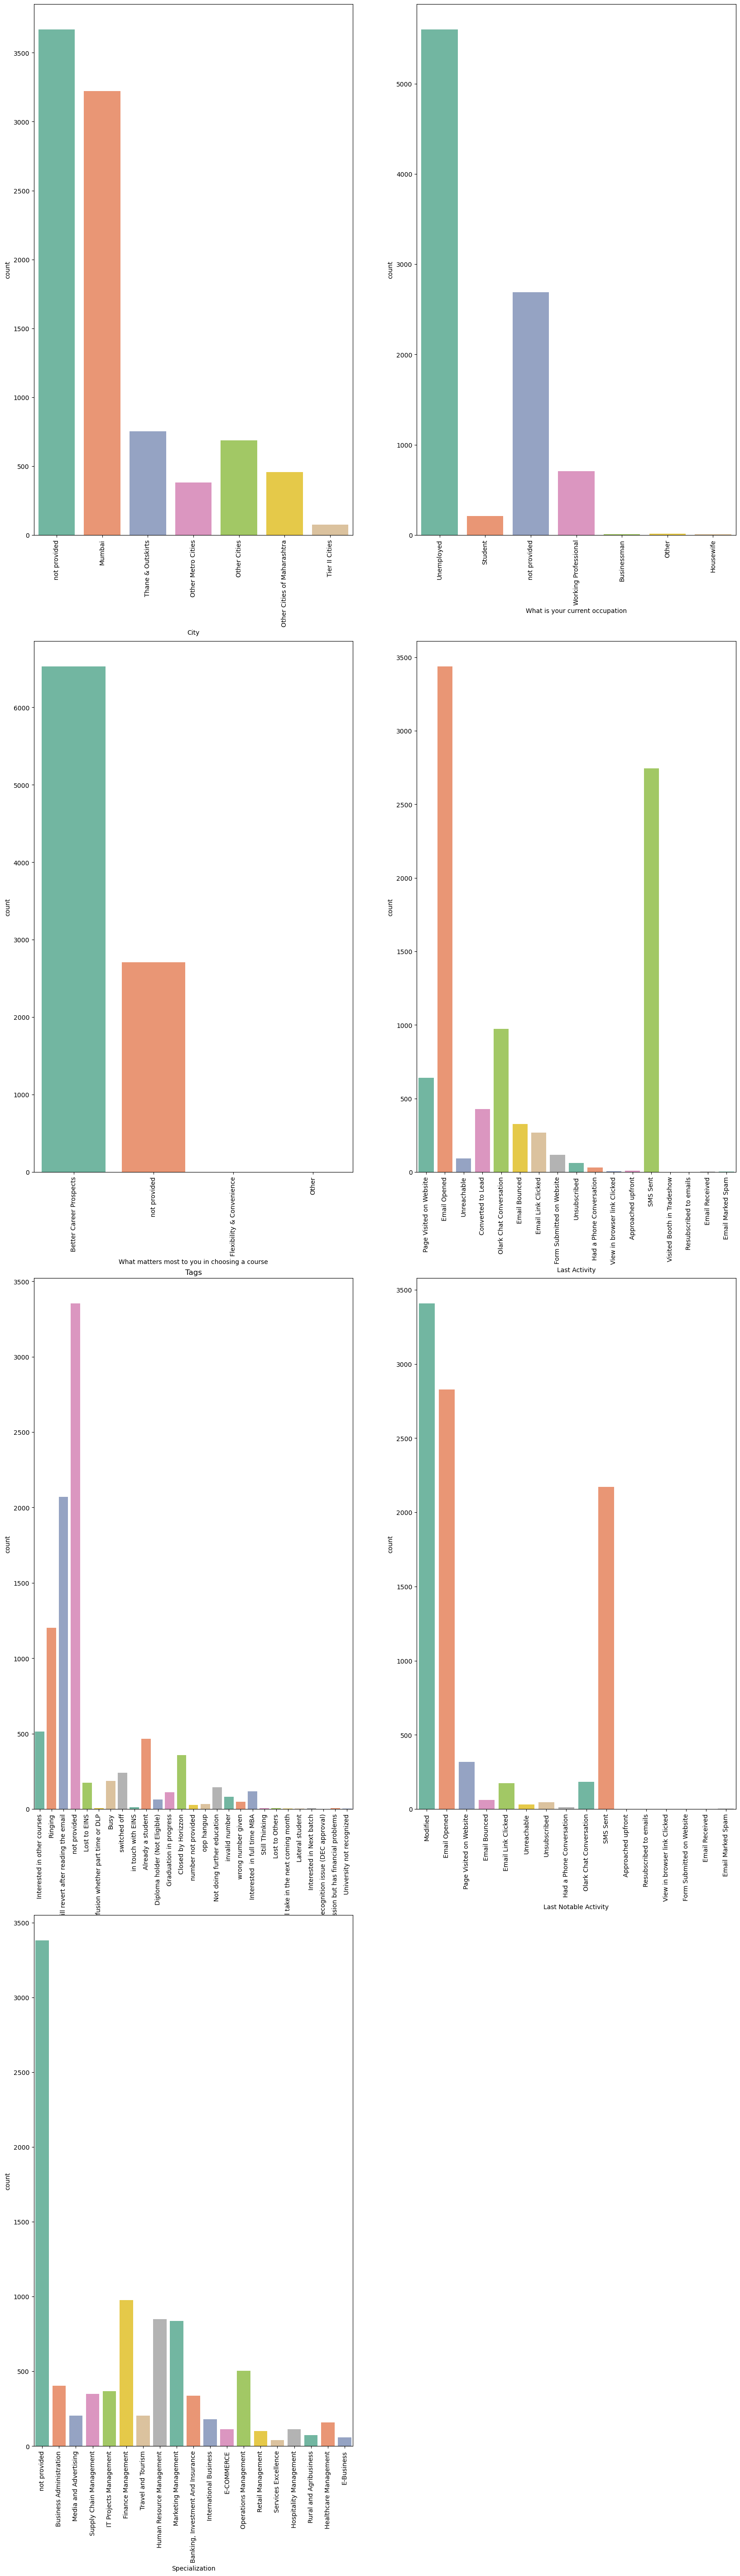

In [28]:
plt.figure(figsize = (20,70))
Pal="Set2"
plt.subplot(4,2,1)
sns.countplot(x=leadScoringDf_final['City'],palette = Pal).tick_params(axis='x', rotation = 90)

plt.subplot(4,2,2)
sns.countplot(x=leadScoringDf_final['What is your current occupation'],palette = Pal).tick_params(axis='x', rotation = 90)

plt.subplot(4,2,3)
sns.countplot(x=leadScoringDf_final['What matters most to you in choosing a course'],palette = Pal).tick_params(axis='x', rotation = 90)

plt.subplot(4,2,4)
sns.countplot(x=leadScoringDf_final['Last Activity'],palette = Pal).tick_params(axis='x', rotation = 90)

plt.subplot(4,2,5)
sns.countplot(x=leadScoringDf_final['Tags'],palette = Pal).tick_params(axis='x', rotation = 90)
plt.title('Tags')

plt.subplot(4,2,6)
sns.countplot(x=leadScoringDf_final['Last Notable Activity'],palette = Pal).tick_params(axis='x', rotation = 90)

plt.subplot(4,2,7)
sns.countplot(x=leadScoringDf_final['Specialization'],palette = Pal).tick_params(axis='x', rotation = 90)

plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b><br><b>'What matters most to you in choosing a course'</b> feature is highly skewed, so not much useful.
        <br>* leads from Mumbai city are more than other cities.
        <br>* Most of the customers are unemployed.
        <br>* Better Career Prospects is the main motto behind doing this course for the customers.
        <br>* Email opened, SMS sent are last activity by majority of the customers followed by olark chat conversation.
        <br>* Will revert after reading the email, Ringing tags Tags assigned to majority of the customers indicating the current status of the lead followed by 'Already a student' Tag.
        <br>* Modified, Email opened are last notable activities by most of the customers followed by SMS sent.</br>
        * Most of the customers worked in Management specializations before. 
    </span>    
</div>

#### Target feature

In [29]:
Converted = (sum(leadScoringDf_final['Converted'])/len(leadScoringDf_final['Converted'].index))*100
Converted

38.53896103896104

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>The lead conversion rate is 38%.
    </span>    
</div>

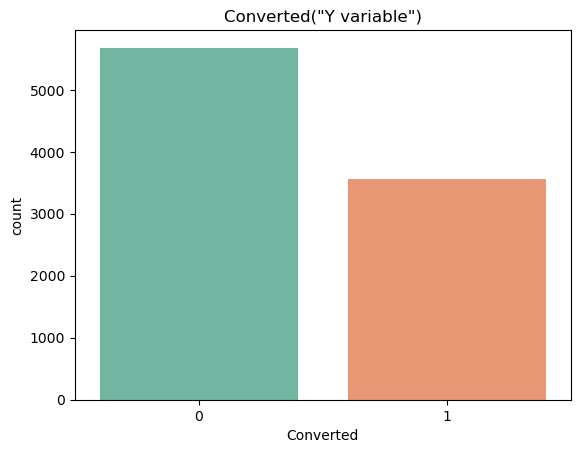

In [30]:
sns.countplot(x=leadScoringDf_final['Converted'],palette = Pal)
plt.title('Converted("Y variable")')
plt.show()

### Numerical Univariate Analysis

In [31]:
leadScoringDf_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

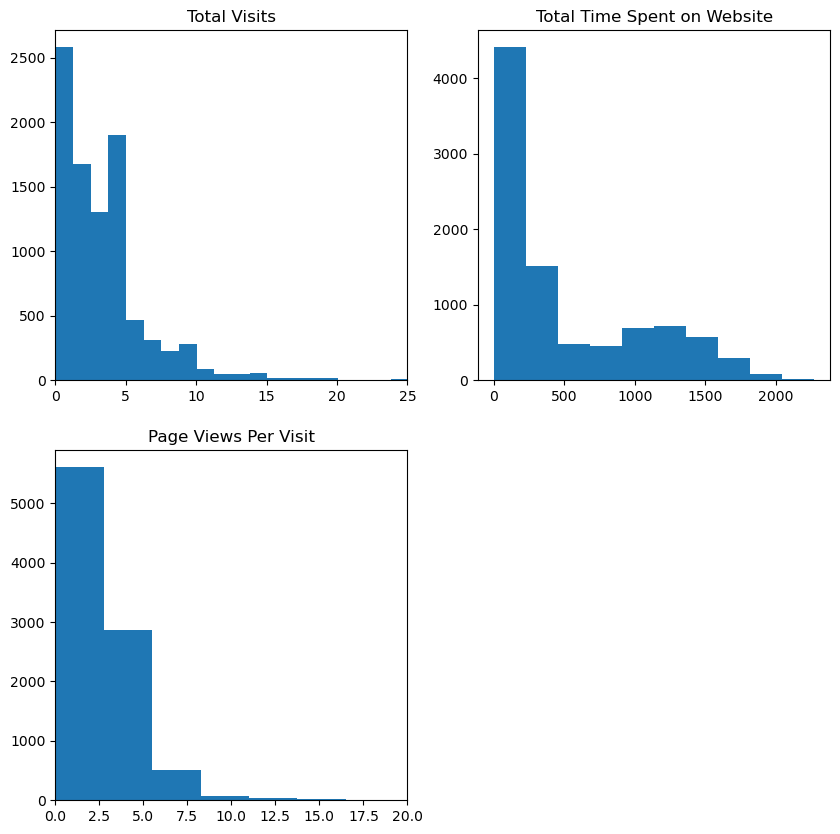

In [32]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leadScoringDf_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leadScoringDf_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leadScoringDf_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Categorical features vs Target feature

In [33]:
#checking value counts of Specialization column

leadScoringDf_final['Specialization'].value_counts(dropna=False)

Specialization
not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### Specialization Feature

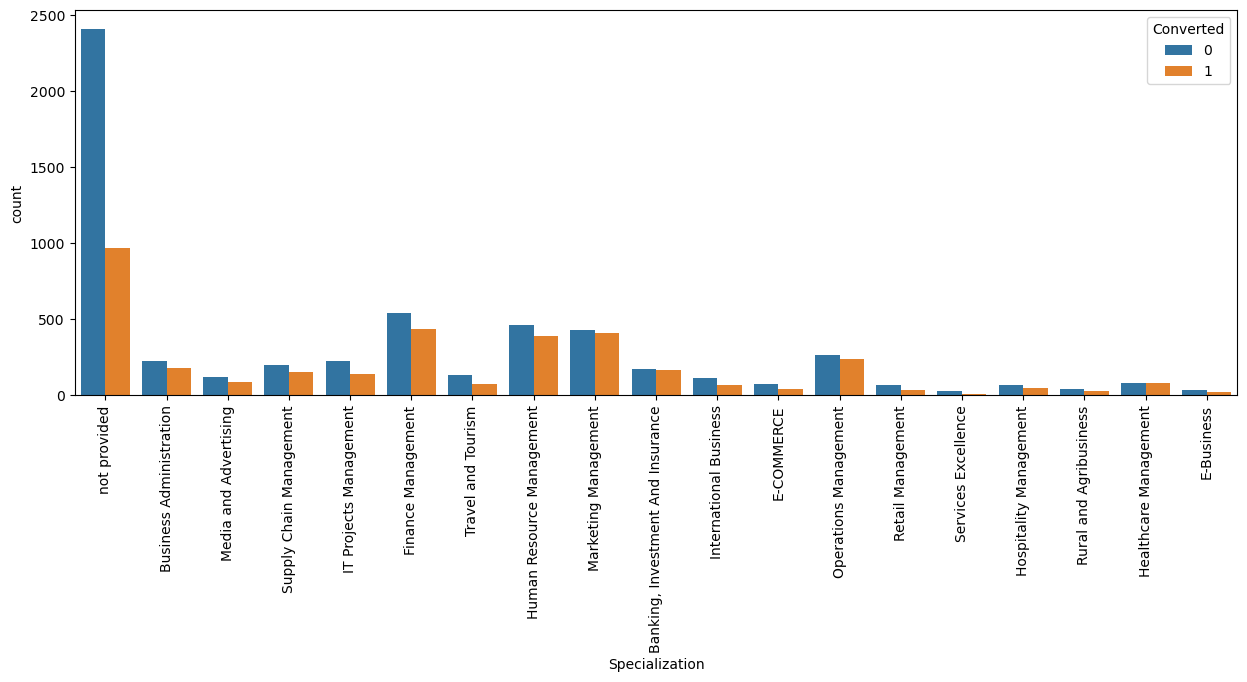

In [34]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leadScoringDf_final,x='Specialization', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.
    </span>    
</div

##### Combining Management Specializations because they show similar trends

In [35]:
leadScoringDf_final['Specialization'] = leadScoringDf_final['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

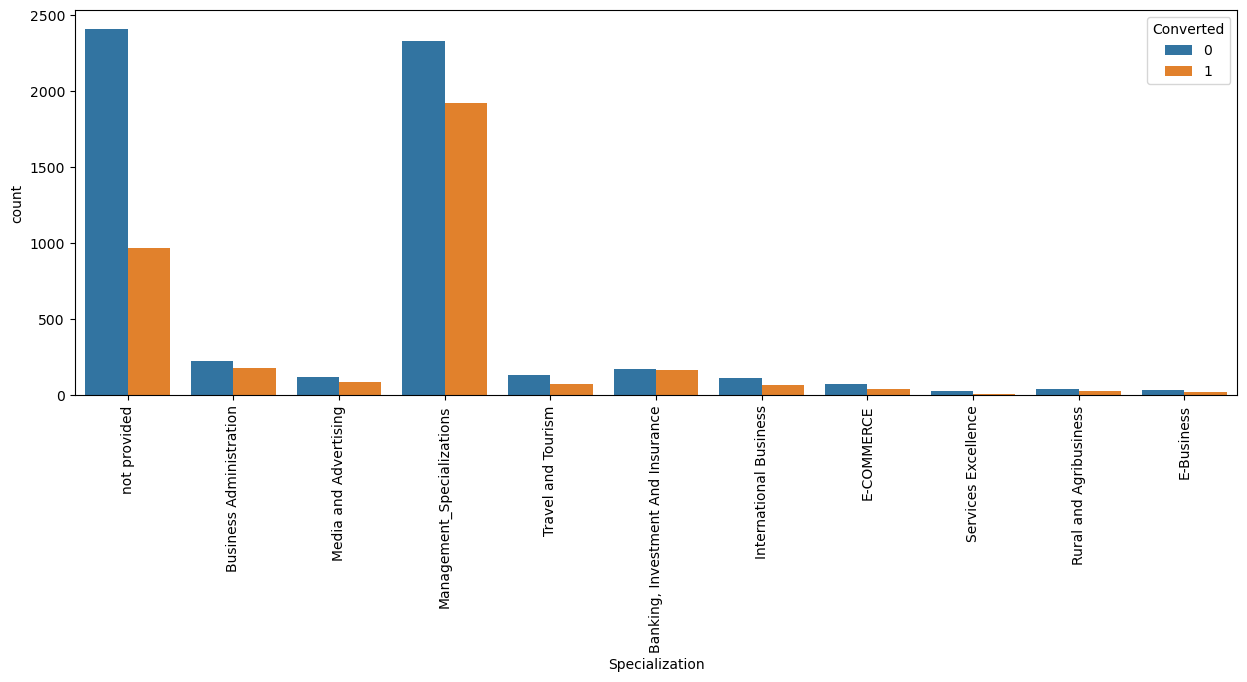

In [36]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(leadScoringDf_final,x='Specialization', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### "What is your current occupation" Feature

In [37]:
#What is your current occupation

leadScoringDf_final['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

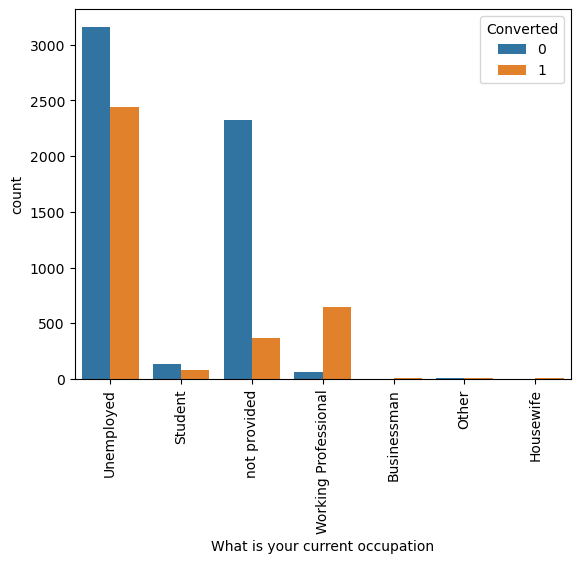

In [38]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leadScoringDf_final,x='What is your current occupation', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>*  Working Professionals going for the course have high chances of joining it.</br>
        * Unemployed leads are the most in terms of Absolute numbers.
    </span>    
</div>


#### "What matters most to you in choosing a course" Feature

In [39]:
#checking value counts

leadScoringDf_final['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

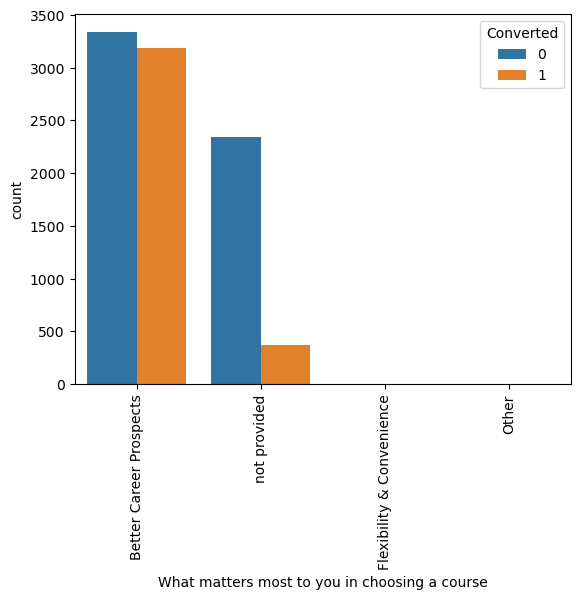

In [40]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leadScoringDf_final,x='What matters most to you in choosing a course', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [41]:
#checking value counts of variable
leadScoringDf_final['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [42]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

#### Tags feature

In [43]:
#checking value counts of Tag variable
leadScoringDf_final['Tags'].value_counts(dropna=False)

Tags
not provided                                         3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

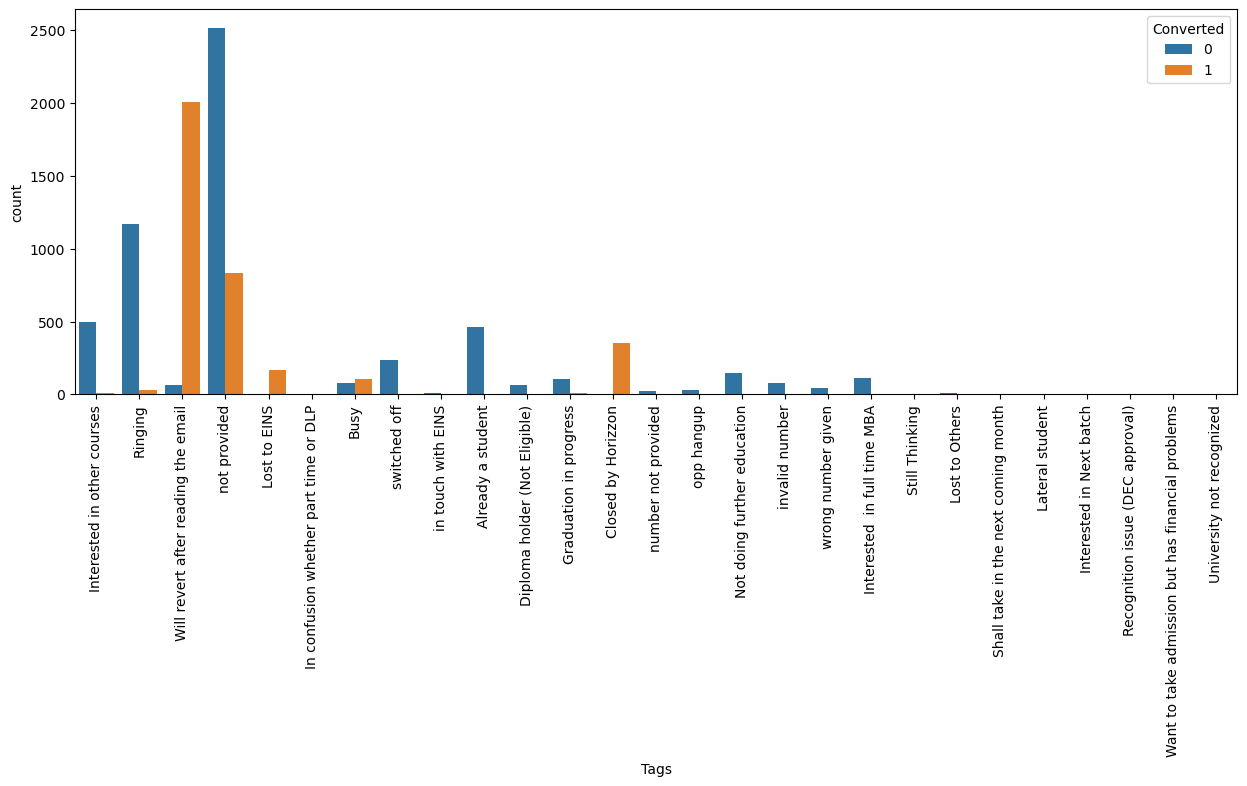

In [44]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leadScoringDf_final,x='Tags', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Replacing tags of low frequency with "Other Tags"

In [45]:
leadScoringDf_final['Tags'] = leadScoringDf_final['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off', 'Already a student','Not doing further education','invalid number',
                                       'wrong number given','Interested  in full time MBA'], 'Other_Tags')

In [46]:
#checking value counts of Tag variable after conversion
leadScoringDf_final['Tags'].value_counts(dropna=False)

Tags
not provided                           3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: count, dtype: int64

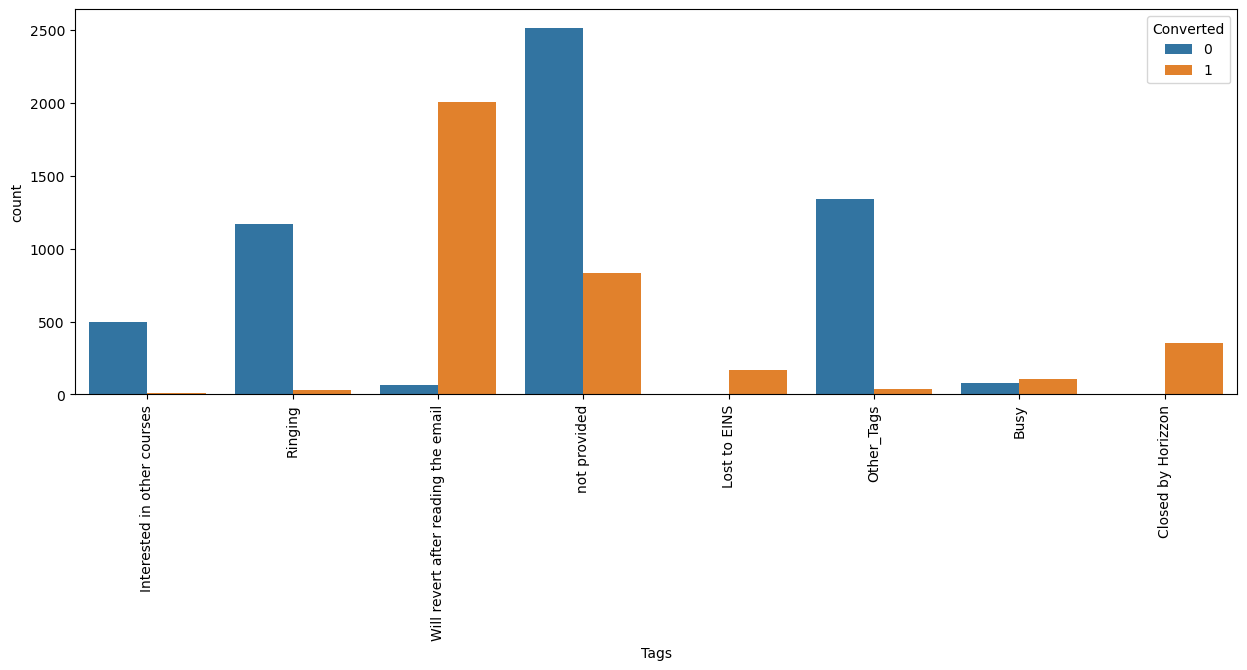

In [47]:
#visualizing Tags after conversion

plt.figure(figsize=(15,5))
s1=sns.countplot(leadScoringDf_final,x='Tags', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [48]:
#checking percentage of missing values
round(100*(leadScoringDf_final.isnull().sum()/len(leadScoringDf_final.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

#### Lead Source feature

In [49]:
#checking value counts of Lead Source column

leadScoringDf_final['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

##### Replacing Nan Values and combining low frequency values to Others

In [50]:
leadScoringDf_final['Lead Source'] = leadScoringDf_final['Lead Source'].replace(np.nan,'Others')
leadScoringDf_final['Lead Source'] = leadScoringDf_final['Lead Source'].replace('google','Google')
leadScoringDf_final['Lead Source'] = leadScoringDf_final['Lead Source'].replace('Facebook','Social Media')
leadScoringDf_final['Lead Source'] = leadScoringDf_final['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

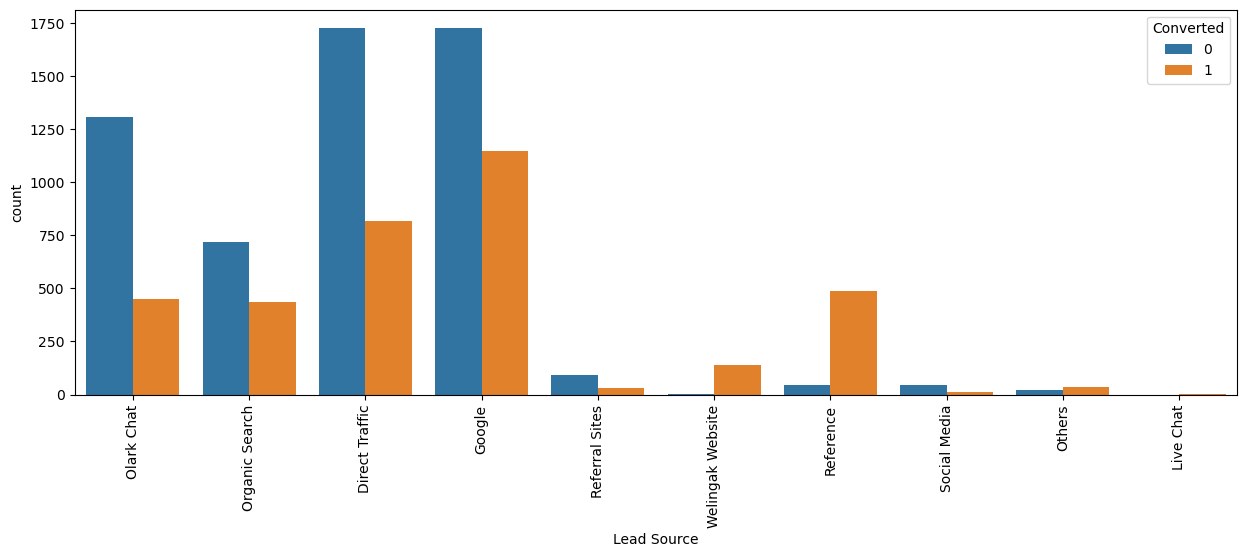

In [51]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leadScoringDf_final,x='Lead Source', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>*  Maximum number of leads are generated by Google and Direct traffic.
        <br>*  Conversion Rate of reference leads and leads through welingak website is high.
        <br>* Improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.
    </span>    
</div>

#### Last Activity feature

In [52]:
# Last Activity 

leadScoringDf_final['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

##### Replacing Nan Values and combining low frequency values to Others

In [53]:
leadScoringDf_final['Last Activity'] = leadScoringDf_final['Last Activity'].replace(np.nan,'Others')
leadScoringDf_final['Last Activity'] = leadScoringDf_final['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

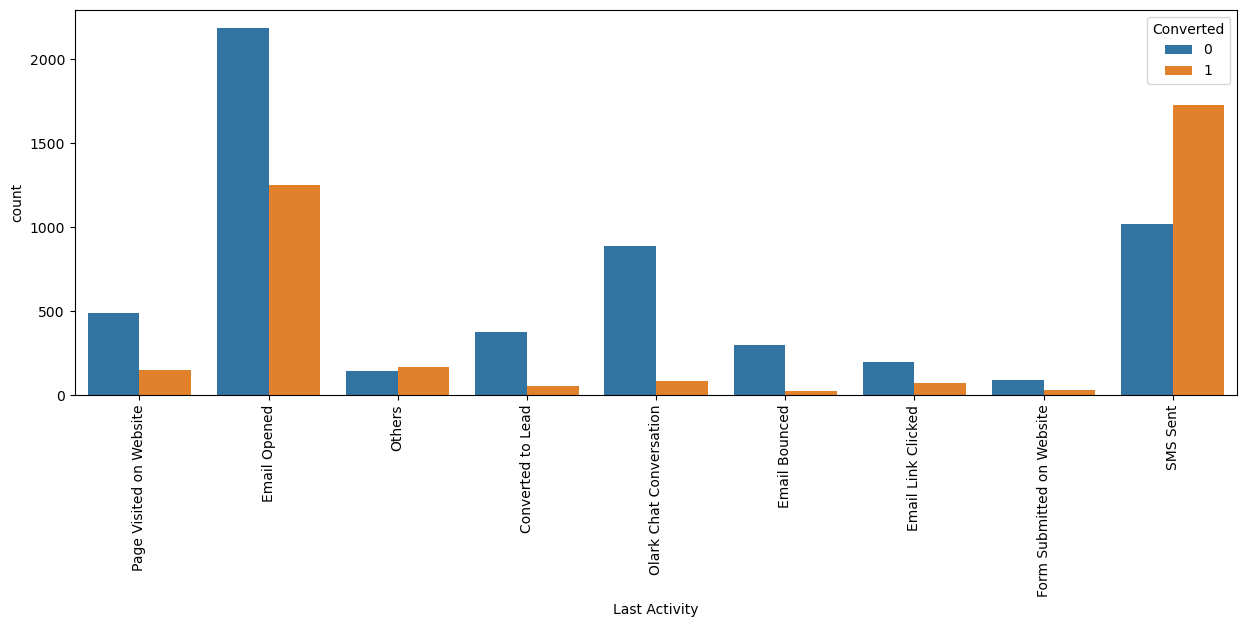

In [54]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leadScoringDf_final,x='Last Activity', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [55]:
# Last Activity:

leadScoringDf_final['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [56]:
#Check the Null Values in All Columns:
round(100*(leadScoringDf_final.isnull().sum()/len(leadScoringDf_final.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [57]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leadScoringDf_final = leadScoringDf_final.dropna()

In [58]:
#Checking percentage of Null Values in All Columns:
round(100*(leadScoringDf_final.isnull().sum()/len(leadScoringDf_final.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

#### Lead Origin feature

In [59]:
#Lead Origin
leadScoringDf_final['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

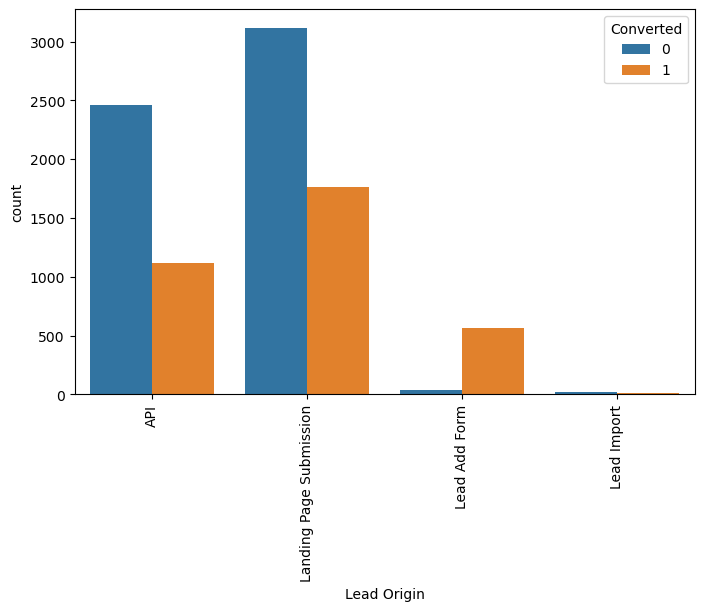

In [60]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leadScoringDf_final,x='Lead Origin', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>*  API and Landing Page Submission bring higher number of leads as well as conversion.
        <br>* Lead Add Form has a very high conversion rate but count of leads are not very high.
        <br>* In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.
    </span>    
</div>

#### Do Not Email & Do Not Call features

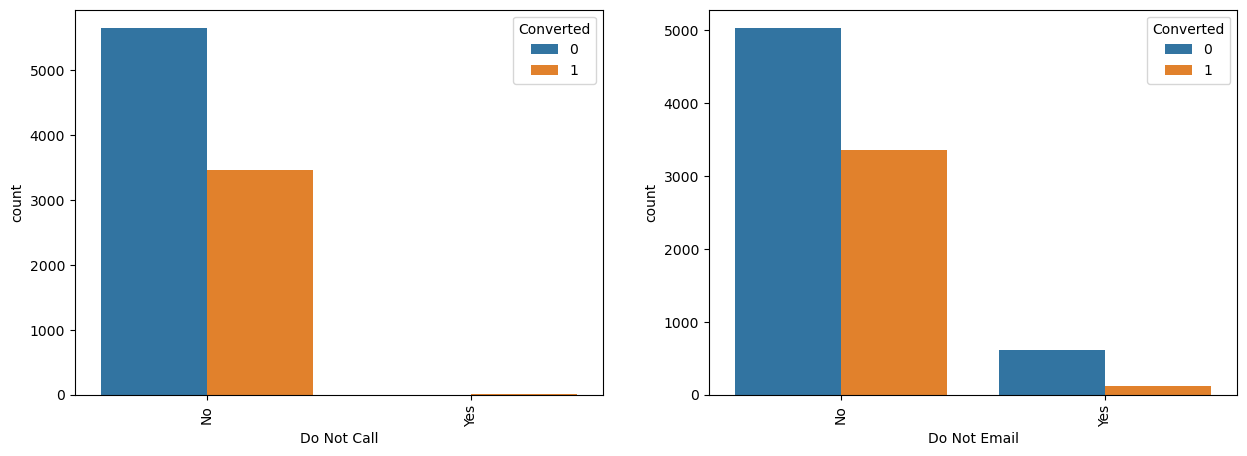

In [61]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leadScoringDf_final,x='Do Not Call', hue='Converted')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leadScoringDf_final,x='Do Not Email', hue='Converted')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [62]:
#checking value counts for Do Not Call
leadScoringDf_final['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     9101
Yes       2
Name: count, dtype: int64

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b>
        <br>* Do Not Call can be dropped since 90% of data is No.      </span>    
</div>

In [63]:
#checking value counts for Do Not Email
leadScoringDf_final['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

In [64]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

#### Treating Imbalanced data 

In [65]:
leadScoringDf_final.Search.value_counts(dropna=False)

Search
No     9089
Yes      14
Name: count, dtype: int64

In [66]:
leadScoringDf_final['Newspaper Article'].value_counts(dropna=False)

Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64

In [67]:
leadScoringDf_final['X Education Forums'].value_counts(dropna=False)

X Education Forums
No     9102
Yes       1
Name: count, dtype: int64

In [68]:
leadScoringDf_final['Newspaper'].value_counts(dropna=False)

Newspaper
No     9102
Yes       1
Name: count, dtype: int64

In [69]:
leadScoringDf_final['Digital Advertisement'].value_counts(dropna=False)

Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64

In [70]:
leadScoringDf_final['Through Recommendations'].value_counts(dropna=False)

Through Recommendations
No     9096
Yes       7
Name: count, dtype: int64

In [71]:
leadScoringDf_final['A free copy of Mastering The Interview'].value_counts(dropna=False)

A free copy of Mastering The Interview
No     6215
Yes    2888
Name: count, dtype: int64

In [72]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations'])

#### Last Notable Activity feature

In [73]:
#checking value counts of last Notable Activity
leadScoringDf_final['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [74]:
#clubbing lower frequency values

leadScoringDf_final['Last Notable Activity'] = leadScoringDf_final['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

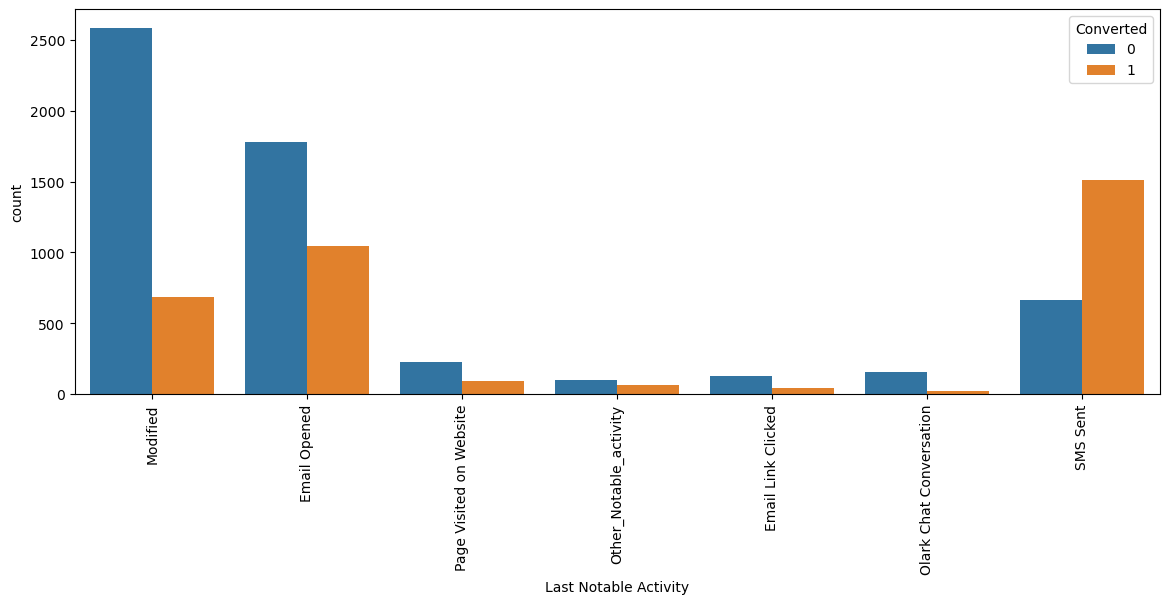

In [75]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leadScoringDf_final)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [76]:
#checking value counts for variable

leadScoringDf_final['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: count, dtype: int64

In [77]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [78]:
#dropping columns
leadScoringDf_final = leadScoringDf_final.drop(cols_to_drop,axis=1)
leadScoringDf_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

#### Numerical Features Analysis

In [79]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leadScoringDf_final['Converted'])/len(leadScoringDf_final['Converted'].index))*100
Converted

38.02043282434362

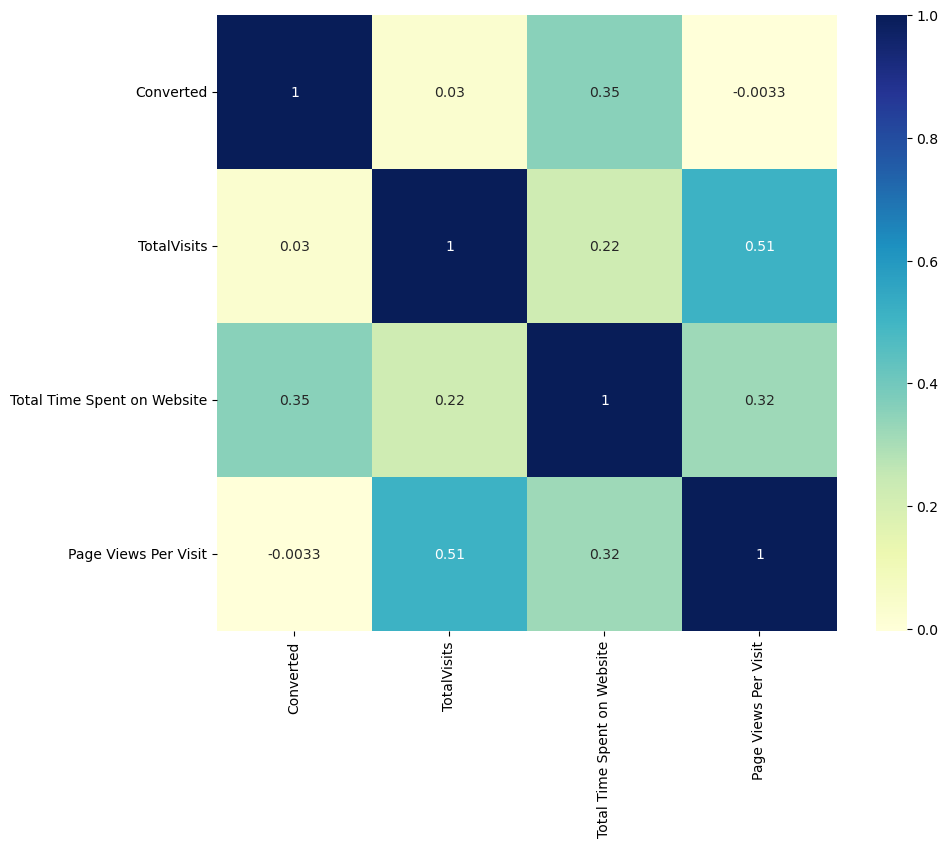

In [80]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leadScoringDf_final.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

<br><br>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b>
        <br>*  No much corelation observed between numerical features.</br>
        </span>    
</div>

#### TotalVisits feature

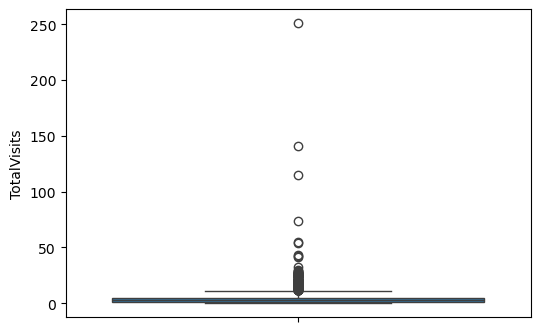

In [81]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leadScoringDf_final['TotalVisits'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
<b>Info:</b><br>  Since there are Outliers for the above feature, we have to do Outlier Treatment.</br>
    </span>
</div>

In [82]:
#checking percentile values for "Total Visits"

leadScoringDf_final['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

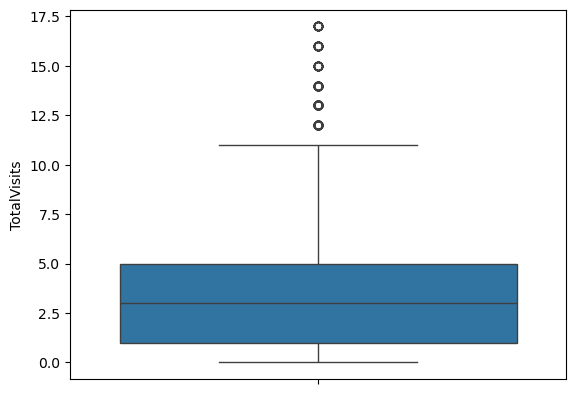

In [83]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leadScoringDf_final.TotalVisits.quantile(0.99)
leadScoringDf_final = leadScoringDf_final[(leadScoringDf_final.TotalVisits <= Q3)]
Q1 = leadScoringDf_final.TotalVisits.quantile(0.01)
leadScoringDf_final = leadScoringDf_final[(leadScoringDf_final.TotalVisits >= Q1)]
sns.boxplot(y=leadScoringDf_final['TotalVisits'])
plt.show()

In [84]:
leadScoringDf_final.shape

(9020, 14)

#### Total Time Spent on Website feature

In [85]:
#checking percentiles for "Total Time Spent on Website"

leadScoringDf_final['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

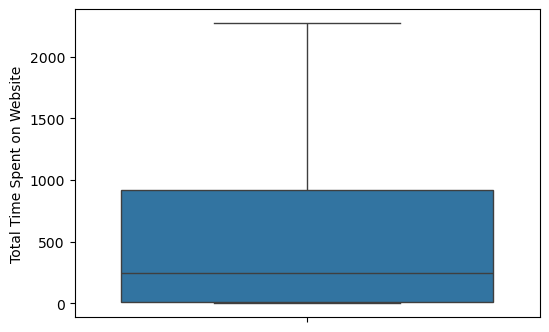

In [86]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leadScoringDf_final['Total Time Spent on Website'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
<b>Info:</b><br>  Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this feature.</br>
    </span>
</div>lumn

#### Page Views Per Visit feature

In [87]:
#checking spread of "Page Views Per Visit"

leadScoringDf_final['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

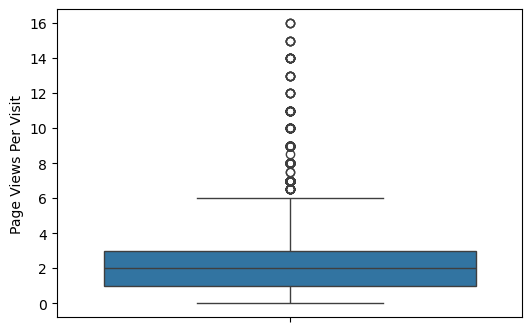

In [88]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leadScoringDf_final['Page Views Per Visit'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
<b>Info:</b><br>  Since there are Outliers for the above feature, we have to do Outlier Treatment.</br>
    </span>
</div>

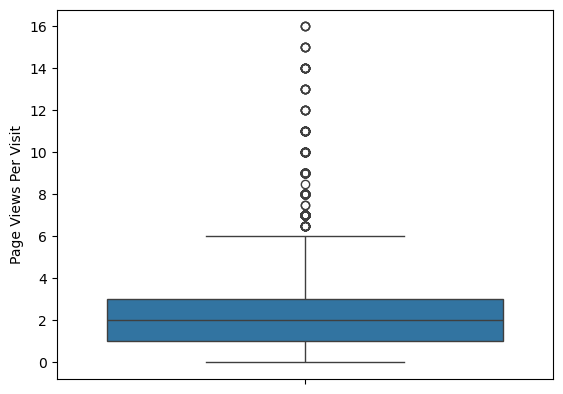

In [89]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leadScoringDf_final['Page Views Per Visit'].quantile(0.99)
leads = leadScoringDf_final[leadScoringDf_final['Page Views Per Visit'] <= Q3]
Q1 = leadScoringDf_final['Page Views Per Visit'].quantile(0.01)
leadScoringDf_final = leadScoringDf_final[leadScoringDf_final['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leadScoringDf_final['Page Views Per Visit'])
plt.show()

In [90]:
leadScoringDf_final.shape

(9020, 14)

#### TotalVisits vs Converted

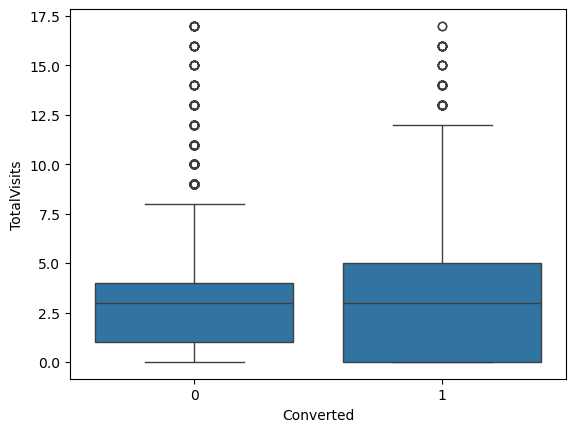

In [91]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leadScoringDf_final)
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>*  Median for converted and not converted leads are the close.</br>
        *  Nothing conclusive can be said on the basis of Total Visits.
    </span>    
</div>


#### Total Time Spent on Website vs Converted

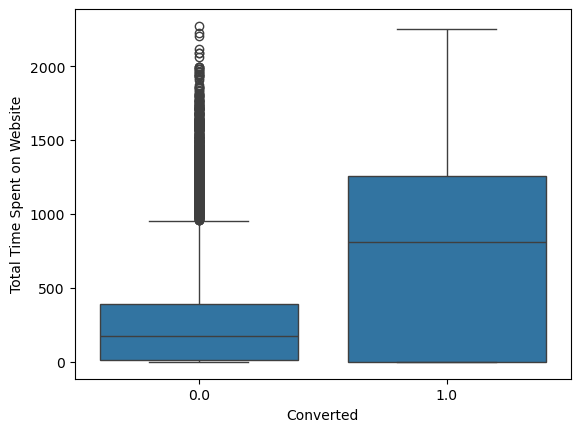

In [92]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leadScoringDf_final['Total Time Spent on Website'])
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>*  Leads spending more time on the website are more likely to be converted.</br>
        *  Website should be made more engaging to make leads spend more time.
    </span>    
</div>

#### Page Views Per Visit vs Converted

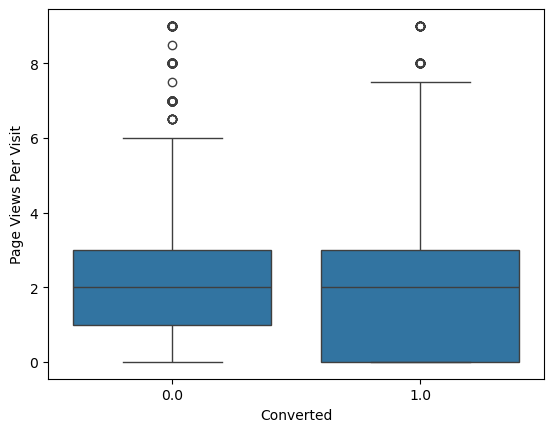

In [93]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leadScoringDf_final['Page Views Per Visit'])
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>*  Median for converted and unconverted leads is the same.</br>
        * Nothing can be said specifically for lead conversion from Page Views Per Visit.
    </span>    
</div>


In [94]:
#checking missing values in leftover columns/

round(100*(leadScoringDf_final.isnull().sum()/len(leadScoringDf_final.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

### Dummy Variables for Categorical Features

In [95]:
leadScoringDf_final=leads

In [96]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [97]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [98]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation','City']], drop_first=True)
dummy = dummy.drop(['City_not provided','What is your current occupation_not provided'], axis = 1)
leads = pd.concat([leads,dummy],axis=1)

In [99]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_not provided'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [100]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [101]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [102]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [103]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_not provided'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [104]:
#dropping the original columns after dummy variable creation
leads.drop(cat_cols,axis = 1,inplace = True)

In [105]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [106]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,2.0,1532,2.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,0,1.0,305,1.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,2.0,1428,1.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Train-Test Split

In [107]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   bool   
 5   Lead Origin_Lead Add Form                             8953 non-null   bool   
 6   Lead Origin_Lead Import                               8953 non-null   bool   
 7   What is your current occupation_Housewife             8953 non-null   bool   
 8   What is your current occupation_Other                 8953 non-

In [108]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   bool   
 4   Lead Origin_Lead Add Form                             6267 non-null   bool   
 5   Lead Origin_Lead Import                               6267 non-null   bool   
 6   What is your current occupation_Housewife             6267 non-null   bool   
 7   What is your current occupation_Other                 6267 non-null   bool   
 8   What is your current occupation_Student               6267 n

### Scaling features

In [111]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4696,-0.030697,-0.037832,0.399961,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
3274,0.319082,-0.642138,-0.127967,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2164,-0.380477,-0.154676,-0.127967,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1667,0.319082,1.258415,-0.481679,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


### Logistic Regression Model Building

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Info:</b><b> Decided to use combination of automated feature selection:</b></br>
<b>Automated Selection:</b>During the initial stage, researcher will use RFE (Recursive Feature Selection) for automated model selection. In line with industry practice, researcher will explicitly inform RFE function to halve the number of features of given dfataset based on their importance ranking.
</br><b>Manual Selection: </b>Post automated approach, researcher will fine-tune the feature selection using manual approach based on knowledge gained from external desk research and intuition.
    </span>    
</div>

#### Recursive Feature Elimination (RFE)

In [112]:
import statsmodels.api as sm

In [113]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [114]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True])

In [115]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 29),
 ('What is your current occupation_Housewife', False, 15),
 ('What is your current occupation_Other', False, 19),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 24),
 ('City_Other Cities of Maharashtra', False, 30),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 18),
 ('Specialization_Banking, Investment And Insurance', False, 17),
 ('Specialization_Business Administration', False, 36),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 31),
 ('Specialization_International Business', False

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Info: </b><br>* Above results show the suggestions given by RFE function to retain top 15 features.
        <br>* Researcher arrived at 15 as retained features due to indutrial preferred practice of taking half the variables in account while operating RFE function.</br>
    * Wherever the boolean returnd by rfe.supprt_ is True, is the feature suggested by RFE to be included in the model.</br>
    </span>    
</div>

In [116]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [117]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead 

### BUILDING MODEL #1

In [118]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.2
Date:                Tue, 17 Dec 2024   Deviance:                       2544.5
Time:                        21:42:54   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6025
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9900      0.099    -20.092      0.000      -2.184      -1.796
Lead Origin_Lead Add Form                                0.6421      0.449      1.430      0.153      -0.238       1.522
What is your current occupation_Student                  1.8701      0.554      3.377      0.001       0.785       2.955
What is your current occupation_Unemployed               2.1317      0.129     16.578      0.000       1.880       2.384
What is your current occupation_Working Professional     2.7594      0.408      6.756      0.000       1.959       3.560
Lead Source_Welingak Website                             2.9917      1.118      2.676      0.007       0.801       5.183
Last Activity_SMS Sent                                   2.0427      0.116     17.536      0.000       1.814       2.271
Last Notable Activity_Email Link Clicked                -1.4646      0.514     -2.849      0.004      -2.472      -0.457
Last Notable Activity_Modified                          -1.4902      0.125    -11.919      0.000      -1.735      -1.245
Last Notable Activity_Olark Chat Conversation           -1.5954      0.468     -3.408      0.001      -2.513      -0.678
Tags_Closed by Horizzon                                  5.8764      1.026      5.730      0.000       3.866       7.886
Tags_Interested in other courses                        -3.2638      0.383     -8.523      0.000      -4.014      -2.513
Tags_Lost to EINS                                        5.3759      0.614      8.757      0.000       4.173       6.579
Tags_Other_Tags                                         -3.7942      0.216    -17.588      0.000      -4.217      -3.371
Tags_Ringing                                            -4.7347      0.245    -19.313      0.000      -5.215      -4.254
Tags_Will revert after reading the email                 3.1246      0.200     15.600      0.000       2.732       3.517
========================================================================================================================
"""

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b>
        <br>*  p-value of variable Lead Origin_Lead Add Form is high, so we can drop it.</br>
        </span>    
</div>

In [119]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)

### BUILDING MODEL #2

In [120]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1273.3
Date:                Tue, 17 Dec 2024   Deviance:                       2546.6
Time:                        21:42:54   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9899      0.099    -20.098      0.000      -2.184      -1.796
What is your current occupation_Student                  1.9124      0.545      3.511      0.000       0.845       2.980
What is your current occupation_Unemployed               2.1383      0.128     16.642      0.000       1.886       2.390
What is your current occupation_Working Professional     2.7783      0.410      6.783      0.000       1.976       3.581
Lead Source_Welingak Website                             3.6273      1.026      3.537      0.000       1.617       5.637
Last Activity_SMS Sent                                   2.0488      0.116     17.613      0.000       1.821       2.277
Last Notable Activity_Email Link Clicked                -1.4663      0.513     -2.856      0.004      -2.472      -0.460
Last Notable Activity_Modified                          -1.4990      0.125    -11.982      0.000      -1.744      -1.254
Last Notable Activity_Olark Chat Conversation           -1.6037      0.470     -3.415      0.001      -2.524      -0.683
Tags_Closed by Horizzon                                  6.1407      1.016      6.043      0.000       4.149       8.132
Tags_Interested in other courses                        -3.2621      0.383     -8.516      0.000      -4.013      -2.511
Tags_Lost to EINS                                        5.3863      0.614      8.775      0.000       4.183       6.589
Tags_Other_Tags                                         -3.7945      0.216    -17.602      0.000      -4.217      -3.372
Tags_Ringing                                            -4.7196      0.244    -19.318      0.000      -5.198      -4.241
Tags_Will revert after reading the email                 3.1667      0.199     15.936      0.000       2.777       3.556
========================================================================================================================
"""

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b>
        <br>*  p-value of feature 'Last Notable Activity_Email Link Clicked' is high, so we can drop it.</br>
        </span>    
</div>

#### BUILDING MODEL #3

In [121]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1273.3
Date:                Tue, 17 Dec 2024   Deviance:                       2546.6
Time:                        21:42:55   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9899      0.099    -20.098      0.000      -2.184      -1.796
What is your current occupation_Student                  1.9124      0.545      3.511      0.000       0.845       2.980
What is your current occupation_Unemployed               2.1383      0.128     16.642      0.000       1.886       2.390
What is your current occupation_Working Professional     2.7783      0.410      6.783      0.000       1.976       3.581
Lead Source_Welingak Website                             3.6273      1.026      3.537      0.000       1.617       5.637
Last Activity_SMS Sent                                   2.0488      0.116     17.613      0.000       1.821       2.277
Last Notable Activity_Email Link Clicked                -1.4663      0.513     -2.856      0.004      -2.472      -0.460
Last Notable Activity_Modified                          -1.4990      0.125    -11.982      0.000      -1.744      -1.254
Last Notable Activity_Olark Chat Conversation           -1.6037      0.470     -3.415      0.001      -2.524      -0.683
Tags_Closed by Horizzon                                  6.1407      1.016      6.043      0.000       4.149       8.132
Tags_Interested in other courses                        -3.2621      0.383     -8.516      0.000      -4.013      -2.511
Tags_Lost to EINS                                        5.3863      0.614      8.775      0.000       4.183       6.589
Tags_Other_Tags                                         -3.7945      0.216    -17.602      0.000      -4.217      -3.372
Tags_Ringing                                            -4.7196      0.244    -19.318      0.000      -5.198      -4.241
Tags_Will revert after reading the email                 3.1667      0.199     15.936      0.000       2.777       3.556
========================================================================================================================
"""

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b>
        <br>*  Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables.</br>
        </span>    
</div>

In [122]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6267 non-null   float64
 1   What is your current occupation_Student               6267 non-null   bool   
 2   What is your current occupation_Unemployed            6267 non-null   bool   
 3   What is your current occupation_Working Professional  6267 non-null   bool   
 4   Lead Source_Welingak Website                          6267 non-null   bool   
 5   Last Activity_SMS Sent                                6267 non-null   bool   
 6   Last Notable Activity_Email Link Clicked              6267 non-null   bool   
 7   Last Notable Activity_Modified                        6267 non-null   bool   
 8   Last Notable Activity_Olark Chat Conversation         6267 n

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>During model development stage:</b>

<b>Variance Influence Factor:</b> Also known as VIF available in statsmodel library will be used to determine the variable that needs to be dropped to handle multicollinearity. `We will consider a threshold of 5 beyond which we will drop those variables (Unless any logic forces us to believe in keeping those particular variables in the dataset)`.

During model development, we will start with all the variables in beginning calculating VIF for each of the variables and then building regression model using OLS. We will observe a combination of VIF values and p-values generated by the OLS model and drop the insignificant variables one by one. With each variable being dropped, an increase in R Squared is expected and p-values of leftover variables is expected to reduce and finally we will be left with all significant variables and a workable model.
    </span>    
</div>

#### Calculate VIF

In [123]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
# Generic function to Converting boolean to int64

def convBoolToInt(df,col):
    df[col]=df[col].map({True:1, False: 0})
    return df

In [125]:
# Converting boolean to int64
convBoolToInt(X_train,'What is your current occupation_Student')
convBoolToInt(X_train,'What is your current occupation_Unemployed')
convBoolToInt(X_train,'What is your current occupation_Working Professional')
convBoolToInt(X_train,'Lead Source_Welingak Website')
convBoolToInt(X_train,'Last Activity_SMS Sent')
convBoolToInt(X_train,'Last Notable Activity_Email Link Clicked')
convBoolToInt(X_train,'Last Notable Activity_Modified')
convBoolToInt(X_train,'Last Notable Activity_Olark Chat Conversation')
convBoolToInt(X_train,'Tags_Closed by Horizzon')
convBoolToInt(X_train,'Tags_Interested in other courses')
convBoolToInt(X_train,'Tags_Lost to EINS')
convBoolToInt(X_train,'Tags_Other_Tags')
convBoolToInt(X_train,'Tags_Ringing')
convBoolToInt(X_train,'Tags_Will revert after reading the email')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   float64
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   bool   
 4   Lead Origin_Lead Add Form                             6267 non-null   bool   
 5   Lead Origin_Lead Import                               6267 non-null   bool   
 6   What is your current occupation_Housewife             6267 non-null   bool   
 7   What is your current occupation_Other                 6267 non-null   bool   
 8   What is your current occupation_Student               6267 n

In [126]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [127]:
calculateVIF(X_train[col])

,Features,VIF
1,What is your current occupation_Unemployed,6.64
13,Tags_Will revert after reading the email,3.41
11,Tags_Other_Tags,2.63
12,Tags_Ringing,2.27
2,What is your current occupation_Working Profes...,2.02
9,Tags_Interested in other courses,1.58
4,Last Activity_SMS Sent,1.54
6,Last Notable Activity_Modified,1.37
8,Tags_Closed by Horizzon,1.36
0,What is your current occupation_Student,1.26


<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b>
        <br>*  'What is your current occupation_Unemployed' feature has high VIF. So it can be dropped.</br>
        </span>    
</div>

In [128]:
#dropping column with high VIF

col = col.drop('What is your current occupation_Unemployed',1)

#### BUILDING MODEL #4

In [129]:

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.9
Date:                Tue, 17 Dec 2024   Deviance:                       2841.8
Time:                        21:42:55   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5832
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2358      0.075    -16.436      0.000      -1.383      -1.088
What is your current occupation_Student                  0.1759      0.570      0.309      0.758      -0.942       1.293
What is your current occupation_Working Professional     0.9575      0.404      2.368      0.018       0.165       1.750
Lead Source_Welingak Website                             5.0748      1.026      4.946      0.000       3.064       7.086
Last Activity_SMS Sent                                   2.0671      0.106     19.520      0.000       1.860       2.275
Last Notable Activity_Email Link Clicked                -1.5603      0.488     -3.197      0.001      -2.517      -0.604
Last Notable Activity_Modified                          -1.7673      0.119    -14.843      0.000      -2.001      -1.534
Last Notable Activity_Olark Chat Conversation           -1.6849      0.450     -3.742      0.000      -2.567      -0.802
Tags_Closed by Horizzon                                  7.5753      1.011      7.495      0.000       5.594       9.556
Tags_Interested in other courses                        -1.8195      0.375     -4.847      0.000      -2.555      -1.084
Tags_Lost to EINS                                        6.0240      0.599     10.051      0.000       4.849       7.199
Tags_Other_Tags                                         -2.4088      0.197    -12.207      0.000      -2.796      -2.022
Tags_Ringing                                            -3.3462      0.225    -14.873      0.000      -3.787      -2.905
Tags_Will revert after reading the email                 4.5641      0.184     24.821      0.000       4.204       4.924
========================================================================================================================
"""

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b>
        <br>*  'What is your current occupation_Student	' feature has high p value. So it can be dropped.</br>
        </span>    
</div>

In [130]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Student',1)

#### BUILDING MODEL #5

In [131]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.0
Date:                Tue, 17 Dec 2024   Deviance:                       2841.9
Time:                        21:42:55   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5832
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2351      0.075    -16.437      0.000      -1.382      -1.088
What is your current occupation_Working Professional     0.9524      0.404      2.356      0.018       0.160       1.745
Lead Source_Welingak Website                             5.0740      1.026      4.945      0.000       3.063       7.085
Last Activity_SMS Sent                                   2.0657      0.106     19.527      0.000       1.858       2.273
Last Notable Activity_Email Link Clicked                -1.5578      0.487     -3.197      0.001      -2.513      -0.603
Last Notable Activity_Modified                          -1.7665      0.119    -14.841      0.000      -2.000      -1.533
Last Notable Activity_Olark Chat Conversation           -1.6853      0.451     -3.740      0.000      -2.568      -0.802
Tags_Closed by Horizzon                                  7.5780      1.011      7.498      0.000       5.597       9.559
Tags_Interested in other courses                        -1.8194      0.375     -4.847      0.000      -2.555      -1.084
Tags_Lost to EINS                                        6.0231      0.599     10.050      0.000       4.849       7.198
Tags_Other_Tags                                         -2.4013      0.196    -12.272      0.000      -2.785      -2.018
Tags_Ringing                                            -3.3455      0.225    -14.872      0.000      -3.786      -2.905
Tags_Will revert after reading the email                 4.5702      0.183     24.978      0.000       4.212       4.929
========================================================================================================================
"""

In [132]:
calculateVIF(X_train[col])

,Features,VIF
11,Tags_Will revert after reading the email,1.53
2,Last Activity_SMS Sent,1.42
4,Last Notable Activity_Modified,1.36
0,What is your current occupation_Working Profes...,1.30
9,Tags_Other_Tags,1.16
7,Tags_Interested in other courses,1.12
10,Tags_Ringing,1.10
6,Tags_Closed by Horizzon,1.09
8,Tags_Lost to EINS,1.04
1,Lead Source_Welingak Website,1.03


<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
<b>Observation:</b><br>  VIF for all features are good, moving on to derive the Probabilities, Lead Score, Predictions on Train Data.</br</br>
    </span>
</div>

#### Corelation matrix of final features

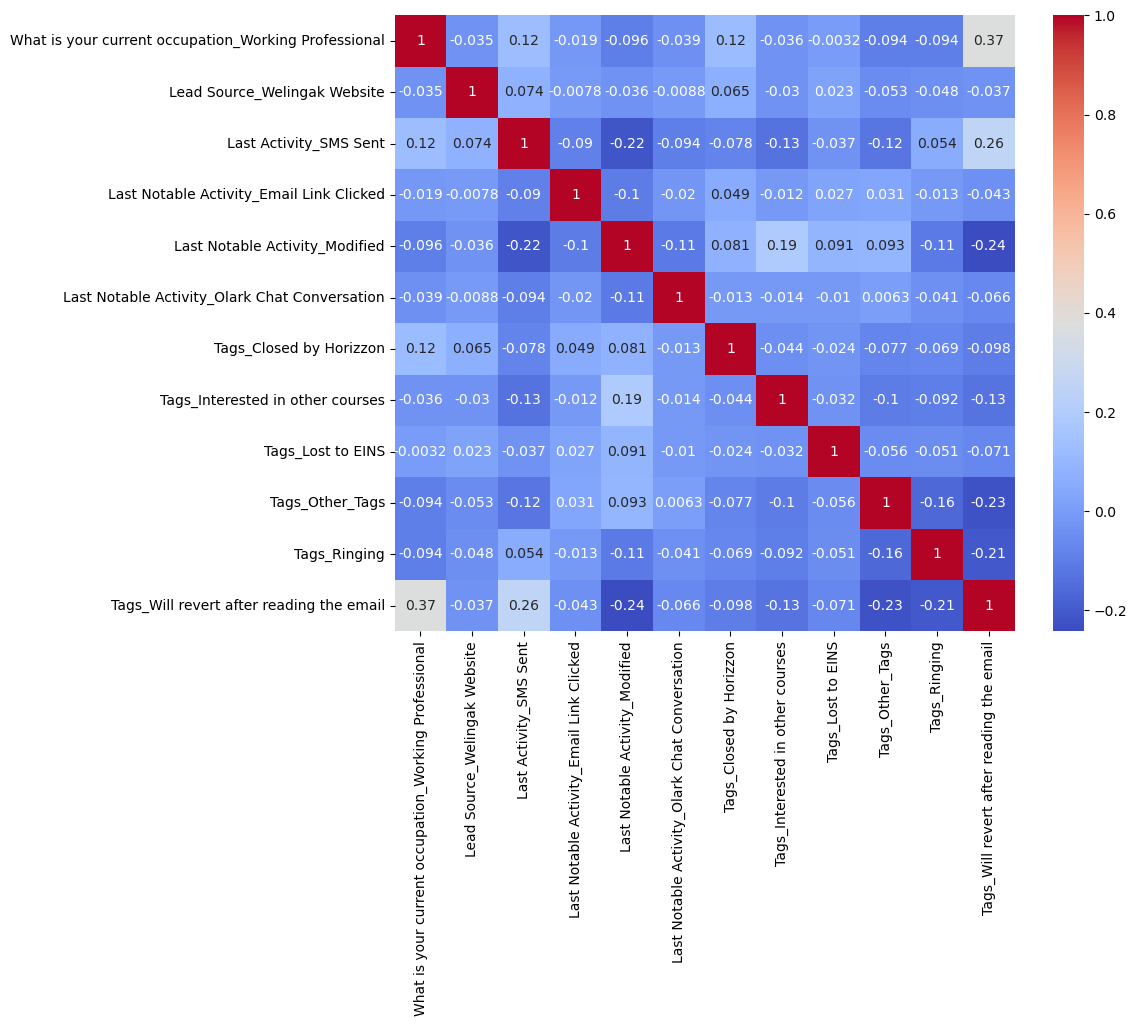

In [133]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(X_train[col].corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.show()

#### Predictions on Train data

In [134]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

9196    0.074819
4696    0.074819
3274    0.696483
2164    0.007994
1667    0.965612
7024    0.225285
8018    0.051154
778     0.281721
6942    0.004483
4440    0.225285
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07481878, 0.07481878, 0.69648337, 0.00799397, 0.96561166,
       0.22528481, 0.05115388, 0.28172092, 0.00448308, 0.22528481])

In [136]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.074819,9196
1,0,0.074819,4696
2,0,0.696483,3274
3,0,0.007994,2164
4,1,0.965612,1667


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
<b>Info:</b><br>  Considering initial threshold as 0.5.</br>
    </span>
</div>

In [137]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.074819,9196,0
1,0,0.074819,4696,0
2,0,0.696483,3274,1
3,0,0.007994,2164,0
4,1,0.965612,1667,1


#### Confusion Matrix

In [138]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3730  152]
 [ 332 2053]]


In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
#### Accuracy

In [141]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.922770065422052


#### Sensitivity

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8607966457023061

#### Specificity

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.9608449252962391

#### False Postive Rate

In [144]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03915507470376095


#### Positive Predictive Value 

In [145]:
# positive predictive value 
print (TP / float(TP+FP))

0.9310657596371882


#### Negative Predictive Value

In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9182668636139832


#### Plotting POC Curve

In [147]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [148]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

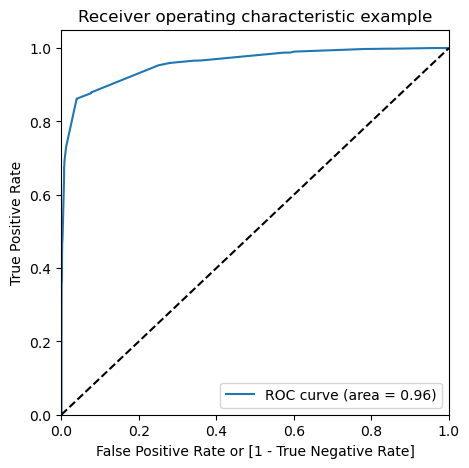

In [149]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observation: </b>
        <br>*  The ROC Curve should be a value close to 1. We are getting a good value of 0.9 indicating a good predictive model.</br>
        </span>    
</div>

#### Finding Optimal Cutoff Point

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
<b>Info:</b><br>  Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that.</br>
    </span>
</div>

In [150]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.074819,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.074819,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.696483,3274,1,1,1,1,1,1,1,1,0,0,0
3,0,0.007994,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.965612,1667,1,1,1,1,1,1,1,1,1,1,1


In [151]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.811553  0.958910  0.721020
0.2   0.2  0.826871  0.953040  0.749356
0.3   0.3  0.923089  0.861635  0.960845
0.4   0.4  0.923089  0.861635  0.960845
0.5   0.5  0.922770  0.860797  0.960845
0.6   0.6  0.922770  0.860797  0.960845
0.7   0.7  0.889740  0.729979  0.987893
0.8   0.8  0.889740  0.729979  0.987893
0.9   0.9  0.875060  0.684277  0.992272


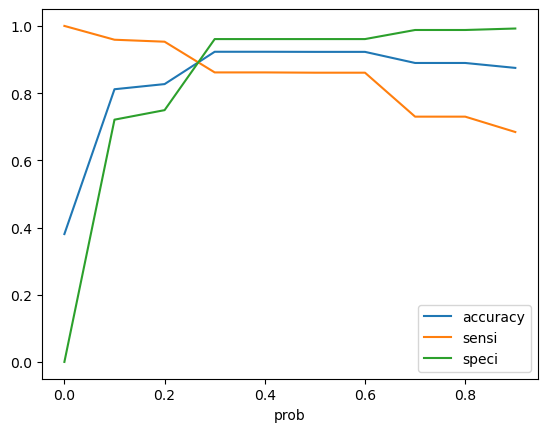

In [152]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
<b>Observation:</b><br>  From the curve above, 0.3 is the optimum point to take it as a cutoff probability.</br>
    </span>
</div>

In [153]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.074819,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.074819,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.696483,3274,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.007994,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.965612,1667,1,1,1,1,1,1,1,1,1,1,1,1


#### Predictions after finding new cut off

In [154]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.074819,9196,0,7
1,0,0.074819,4696,0,7
2,0,0.696483,3274,1,70
3,0,0.007994,2164,0,1
4,1,0.965612,1667,1,97


#### Metrics with new cut off 

In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9230891973831179

In [156]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3730,  152],
       [ 330, 2055]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8616352201257862

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.9608449252962391

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>*  So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data.
        <br>*  Accuracy : 92.3%
        <br>*  Sensitivity : 86.16%
        <br>*  Specificity : 96.08%
    </span>    
</div>

In [160]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03915507470376095


In [161]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9311282283642954


In [162]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9187192118226601


In [163]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3730,  152],
       [ 330, 2055]], dtype=int64)

In [164]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9311282283642954

In [165]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8616352201257862

In [166]:
from sklearn.metrics import precision_score, recall_score

In [167]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9311282283642954

In [168]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8616352201257862

#### Precision Recall Curve

In [169]:
from sklearn.metrics import precision_recall_curve

In [170]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

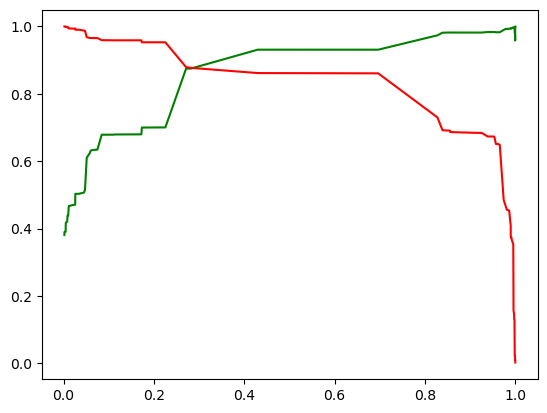

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Scaling Test Data

In [172]:


num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
984,-0.090676,-0.550262,0.356568,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
8135,-0.423857,0.812462,-0.170849,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6915,0.242505,-0.628665,-0.170849,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2712,-0.090676,-0.421456,0.356568,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [173]:
X_test = X_test[col]
X_test.head()

,What is your current occupation_Working Professional,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,False,False,True,False,False,False,False,False,False,False,True,False
984,False,False,True,False,True,False,False,False,False,True,False,False
8135,False,False,True,False,False,False,False,False,False,False,False,False
6915,False,False,False,False,False,False,False,False,False,False,True,False
2712,False,False,False,False,False,False,False,False,False,False,False,True


In [174]:
X_test_sm = sm.add_constant(X_test)

#### Predictions on Test Data

In [175]:
y_test_pred = res.predict(X_test_sm.astype(float))

In [176]:
y_test_pred[:10]

7681    0.074819
984     0.034316
8135    0.696483
6915    0.010144
2712    0.965612
244     0.001749
4698    0.025671
8287    0.047350
6791    0.965612
8970    0.007994
dtype: float64

In [177]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [178]:
# Let's see the head
y_pred_1.head()

,0
7681,0.074819
984,0.034316
8135,0.696483
6915,0.010144
2712,0.965612


In [179]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [180]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [181]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [182]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [183]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.074819
1,0,984,0.034316
2,0,8135,0.696483
3,0,6915,0.010144
4,1,2712,0.965612


In [184]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [185]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.074819
1,0,984,0.034316
2,0,8135,0.696483
3,0,6915,0.010144
4,1,2712,0.965612


In [186]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [187]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.074819,7
1,984,0,0.034316,3
2,8135,0,0.696483,70
3,6915,0,0.010144,1
4,2712,1,0.965612,97


In [188]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [189]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.074819,7,0
1,984,0,0.034316,3,0
2,8135,0,0.696483,70,1
3,6915,0,0.010144,1,0
4,2712,1,0.965612,97,1


#### Accuracy of Test Data

In [190]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.926656738644825

In [191]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1611,   65],
       [ 132,  878]], dtype=int64)

In [192]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity of Test Data

In [193]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8693069306930693

#### Specificity of Test Data

In [194]:
# Let us calculate specificity
TN / float(TN+FP)

0.961217183770883

In [195]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.038782816229116945


In [196]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9310710498409331


In [197]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9242685025817556


#### Precision_score of Test Data

In [198]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9310710498409331

#### Recall_score of Test Data

In [199]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8693069306930693

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>*  After running the model on the Test Data these are the figures we obtain.
        <br>*  Accuracy : 92.67%
        <br>*  Sensitivity : 86.93%
        <br>*  Specificity : 96.12%
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Final Observations: </b>
        <br>*  Let us compare the values obtained for Train & Test.</br>
        <br><b>Train data Metrics</b>
        <br>*  Accuracy : 92.3%
        <br>*  Sensitivity : 86.16%
        <br>*  Specificity : 96.08%</br>
        <br><b>Test data Metrics</b>
        <br>*  Accuracy : 92.67%
        <br>*  Sensitivity : 86.93%
        <br>*  Specificity : 96.12%
        <br>*  Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.
    </span>    
</div>

#### Leads which should be contacted

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
<b>Info:</b><br>  The customers who should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.</br>
    </span>
</div>

In [200]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
4,2712,1,0.965612,97,1
8,6791,1,0.965612,97,1
12,1026,1,0.986446,99,1
13,5167,1,0.995507,100,1
15,5391,1,0.965612,97,1
...,...,...,...,...,...
2654,5190,1,0.995507,100,1
2655,3034,1,0.953534,95,1
2656,700,1,0.965612,97,1
2662,3236,1,0.855356,86,1


In [201]:
print("The Prospect ID of the customers who should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers who should be contacted are :


array([2712, 6791, 1026, 5167, 5391, 8650, 4683, 1594, 1927, 1509, 5036,
       3268, 1311, 5051, 2500, 8622, 7840, 2709, 7051, 2521, 9020, 3511,
       4769, 5649, 6984, 1003, 8977, 3249, 4890, 2853, 1188, 2617, 7888,
       7268,   75, 2623, 8409,  216, 5373, 2562, 2392, 7989,  943,  777,
       6197,  568, 4612, 7536,  973, 4331, 3616, 7707, 8228, 2657, 3412,
       3586, 1950, 7523, 1643, 4259, 2570,   82,  460, 7329, 5747, 1332,
       5000, 4646, 2703, 4634, 3095, 5827, 7470, 6230, 5061, 3307, 3465,
       8588,  187, 8749, 9037, 4793, 7895, 4803, 7126, 6843, 3781, 6816,
       5662, 5752, 5096, 1805, 3123, 2042, 1404, 6711, 1573, 3120, 2118,
       1056, 4977, 8243, 9197, 1586, 8980, 2984, 4782, 4788, 5071, 1157,
       5506, 4320, 4061, 5194, 4398, 6698, 1809, 4739, 2014, 3839,  764,
       8966, 5035, 5205,  807, 7570, 7150, 5206, 2444, 4816, 7814, 5860,
       5719, 2357, 8583, 1510, 9107,  320, 9031, 2127, 5621, 4608, 9093,
        370, 2079, 4555,  466, 8865, 2598, 3519, 80

####  Important Features from our final model

In [202]:
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                                 7.578018
Tags_Lost to EINS                                       6.023126
Lead Source_Welingak Website                            5.073982
Tags_Will revert after reading the email                4.570174
Last Activity_SMS Sent                                  2.065738
What is your current occupation_Working Professional    0.952375
const                                                  -1.235130
Last Notable Activity_Email Link Clicked               -1.557804
Last Notable Activity_Olark Chat Conversation          -1.685278
Last Notable Activity_Modified                         -1.766549
Tags_Interested in other courses                       -1.819363
Tags_Other_Tags                                        -2.401273
Tags_Ringing                                           -3.345528
dtype: float64

### Recommendations

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        *  The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
        <br>*  The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
        <br>*  The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
        <br>*  The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
        <br>*  The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
        <br>*  The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
        <br>*  The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
        <br>*  The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
        <br>*  The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.
    </span>    
</div>